In [9]:
%pip install numpy pandas seaborn scikit-learn flask



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd

# Creating a simple sample dataset
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5],
    'title': [
        'Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
        'Toy Story (1995)', 'Heat (1995)',
        'Jumanji (1995)', 'Heat (1995)',
        'Toy Story (1995)', 'Sabrina (1995)',
        'Heat (1995)'
    ],
    'rating': [5, 3, 4, 4, 5, 2, 4, 5, 3, 5]
}

df = pd.DataFrame(data)
print(df.head())



   userId                    title  rating
0       1         Toy Story (1995)       5
1       1           Jumanji (1995)       3
2       1  Grumpier Old Men (1995)       4
3       2         Toy Story (1995)       4
4       2              Heat (1995)       5


In [15]:
#Step 3: Data Wrangling (User-Movie Matrix)

#We’ll create a pivot table showing users as rows and movies as columns.

movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.fillna(0, inplace=True)
print(movie_matrix.head())



title   Grumpier Old Men (1995)  Heat (1995)  Jumanji (1995)  Sabrina (1995)  \
userId                                                                         
1                           4.0          0.0             3.0             0.0   
2                           0.0          5.0             0.0             0.0   
3                           0.0          4.0             2.0             0.0   
4                           0.0          0.0             0.0             3.0   
5                           0.0          5.0             0.0             0.0   

title   Toy Story (1995)  
userId                    
1                    5.0  
2                    4.0  
3                    0.0  
4                    5.0  
5                    0.0  


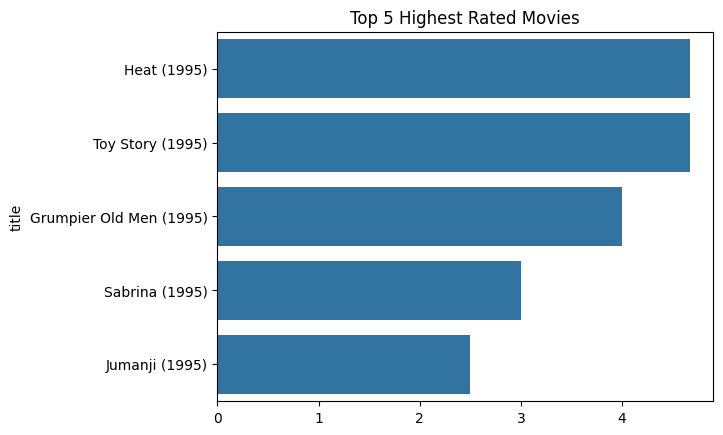

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average rating per movie
avg_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Barplot of top-rated movies
sns.barplot(x=avg_ratings.values[:5], y=avg_ratings.index[:5])
plt.title("Top 5 Highest Rated Movies")
plt.show()



In [17]:
#Step 5: Build the Recommendation Model

#We’ll use Cosine Similarity from Scikit-learn to find movies with similar rating patterns.

from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
cosine_sim = cosine_similarity(movie_matrix.T)
similarity_df = pd.DataFrame(cosine_sim, index=movie_matrix.columns, columns=movie_matrix.columns)

# Recommendation function
def recommend(movie_name):
    if movie_name not in similarity_df.columns:
        return ["Movie not found!"]
    similar_scores = similarity_df[movie_name].sort_values(ascending=False)[1:6]
    return list(similar_scores.index)

# Example test
print(recommend('Toy Story (1995)'))



['Grumpier Old Men (1995)', 'Sabrina (1995)', 'Jumanji (1995)', 'Heat (1995)']


In [18]:
#Step 6: Save & Load the Model

#Save the movie similarity DataFrame for use in Flask.

movie_matrix.to_csv('movie_matrix.csv', index=True)
similarity_df.to_csv('similarity.csv', index=True)

